In [1]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import numpy as np
df = pd.read_csv("netflix_titles_nov_2019.csv")

In [2]:
df.shape

(5837, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   shows_movies  5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [4]:
df.isnull().sum()

show_id            0
shows_movies       0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64

In [5]:
df.type.value_counts(normalize=True)

type
Movie      0.674833
TV Show    0.325167
Name: proportion, dtype: float64

In [6]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
df.head()

,show_id,shows_movies,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,year_added,month_added,season_count
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,2019.0,11.0,1
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,2019-11-30,2019,TV-G,67,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,2019.0,11.0,
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,2019.0,11.0,
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,2019.0,11.0,
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaT,2019,TV-Y,,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,NaN,NaN,2


In [7]:
df.columns.tolist()

['show_id',
 'shows_movies',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description',
 'type',
 'year_added',
 'month_added',
 'season_count']

In [8]:
col = 'type'
grouped = df[col].value_counts().reset_index()
grouped

,type,count
0,Movie,3939
1,TV Show,1898


In [9]:
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="", height=350, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [10]:
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]
col = "year_added"

In [11]:
vc1 = d1[col].value_counts().reset_index()
vc1.columns

Index(['year_added', 'count'], dtype='object')

In [12]:
vc1['count'].apply(lambda x : 100*x/vc1['count'].sum())

0    37.867940
1    26.968974
2    21.559268
3    11.774065
4     1.272872
5     0.238663
6     0.238663
7     0.079554
Name: count, dtype: float64

In [13]:
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/vc1['count'].sum())


In [14]:
vc1 = vc1.sort_values(col)
vc1

,year_added,count,percent
7,2008.0,1,0.079554
6,2012.0,3,0.238663
5,2013.0,3,0.238663
4,2015.0,16,1.272872
3,2016.0,148,11.774065
2,2017.0,271,21.559268
1,2018.0,339,26.968974
0,2019.0,476,37.867940


In [15]:
vc2 = d2[col].value_counts().reset_index()
vc2.columns

Index(['year_added', 'count'], dtype='object')

In [16]:
vc2['count'].apply(lambda x : 100*x/vc2['count'].sum())

0     34.713052
1     32.757745
2     23.184358
3      6.703911
4      1.472829
5      0.482478
6      0.330117
7      0.152362
8      0.101574
9      0.050787
10     0.025394
11     0.025394
Name: count, dtype: float64

In [17]:
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/vc2['count'].sum())
vc2 = vc2.sort_values(col)

In [18]:
vc2 = vc1.sort_values(col)
vc2

,year_added,count,percent
7,2008.0,1,0.079554
6,2012.0,3,0.238663
5,2013.0,3,0.238663
4,2015.0,16,1.272872
3,2016.0,148,11.774065
2,2017.0,271,21.559268
1,2018.0,339,26.968974
0,2019.0,476,37.867940


In [19]:
trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [20]:
col = 'month_added'
vc1 = d1[col].value_counts().reset_index()


In [21]:
vc1['count'].apply(lambda x : 100*x/vc1['count'].sum())

0     11.058075
1     10.342084
2      9.785203
3      9.546539
4      8.989658
5      8.989658
6      7.955449
7      7.796340
8      6.762132
9      6.284805
10     6.284805
11     6.205251
Name: count, dtype: float64

In [22]:
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/vc1['count'].sum())

In [23]:
vc1 = vc1.sort_values(col)

In [24]:
trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
data = [trace1]
c1 = "month_added"
c2 = "rating"
layout = go.Layout(title="In which month, the content is added the most?", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [25]:
small = df.sort_values("release_year", ascending = True)
small = small[small['duration'] != ""]
small[['shows_movies', "release_year"]][:15]

,shows_movies,release_year
4929,Prelude to War,1942
4931,The Battle of Midway,1942
4946,WWII: Report from the Aleutians,1943
4943,Why We Fight: The Battle of Russia,1943
4941,Undercover: How to Operate Behind Enemy Lines,1943
4936,The Memphis Belle: A Story of a\r\nFlying Fort...,1944
4938,The Negro Soldier,1944
4940,Tunisian Victory,1944
4923,Know Your Enemy - Japan,1945
4930,San Pietro,1945


In [26]:
col = 'season_count'
grouped = df[col].value_counts().reset_index()
grouped

,season_count,count
0,,3939
1,1,1259
2,2,298
3,3,157
4,4,60
5,5,46
6,6,21
7,7,21
8,8,16
9,9,7


In [27]:
small = df.sort_values("release_year", ascending = True)
small = small[small['season_count'] != ""]
small[['shows_movies', "release_year"]][:15]

,shows_movies,release_year
2154,Pioneers: First Women Filmmakers*,1925
5143,Pioneers of African-American Cinema,1946
4593,The Twilight Zone (Original Series),1963
4589,The Andy Griffith Show,1967
4266,Star Trek,1968
2623,Monty Python's Fliegender Zirkus,1972
2624,Monty Python's Flying Circus,1974
3503,Dad's Army,1977
3921,El Chavo,1979
2182,Ninja Hattori,1981


In [28]:
col = 'season_count'
vc1 = d1[col].value_counts().reset_index()

In [29]:
vc1['count'].apply(lambda x : 100*x/vc1['count'].sum())

0     66.332982
1     15.700738
2      8.271865
3      3.161222
4      2.423604
5      1.106428
6      1.106428
7      0.842993
8      0.368809
9      0.158061
10     0.158061
11     0.105374
12     0.105374
13     0.105374
14     0.052687
Name: count, dtype: float64

In [30]:
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/vc1['count'].sum())
vc1 = vc1.sort_values(col)

In [31]:
trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
data = [trace1]
layout = go.Layout(title="Seasons", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [32]:
col = "rating"
vc2 = d2[col].value_counts().reset_index()

In [33]:
vc2['count'].apply(lambda x : 100*x/vc2['count'].sum())

0     32.765200
1     24.294073
2     11.116764
3     10.506233
4      5.774612
5      5.138642
6      4.070211
7      2.009667
8      1.577207
9      1.042992
10     0.788603
11     0.686848
12     0.178072
13     0.050878
Name: count, dtype: float64

In [34]:
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/vc2['count'].sum())
vc2 = vc2.sort_values(col)

In [35]:
trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

KeyError: 'rating'

[Text(0, 0, '1898'), Text(0, 0, '3939')]

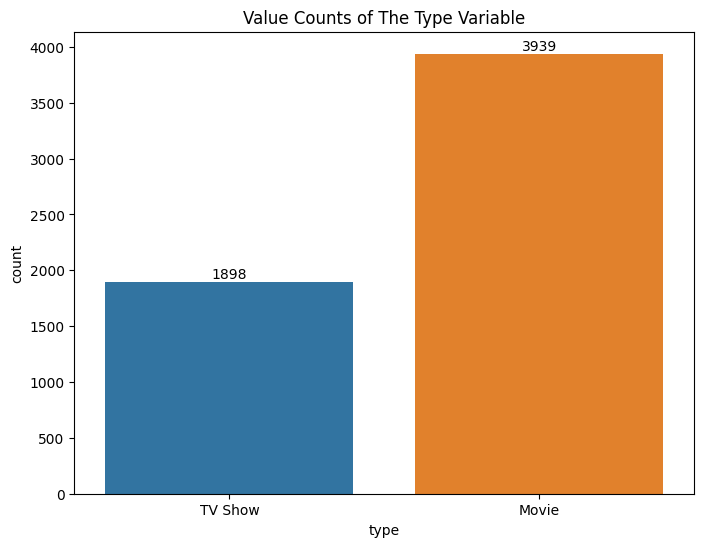

In [36]:
plt.figure(figsize=(8,6))
plt.title("Value Counts of The Type Variable")
marker=dict(color="#a678de")
marker=dict(color="#6ad49b")
cp = sns.countplot(x="type", data=df)
cp.bar_label(cp.containers[0])

[Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2')]

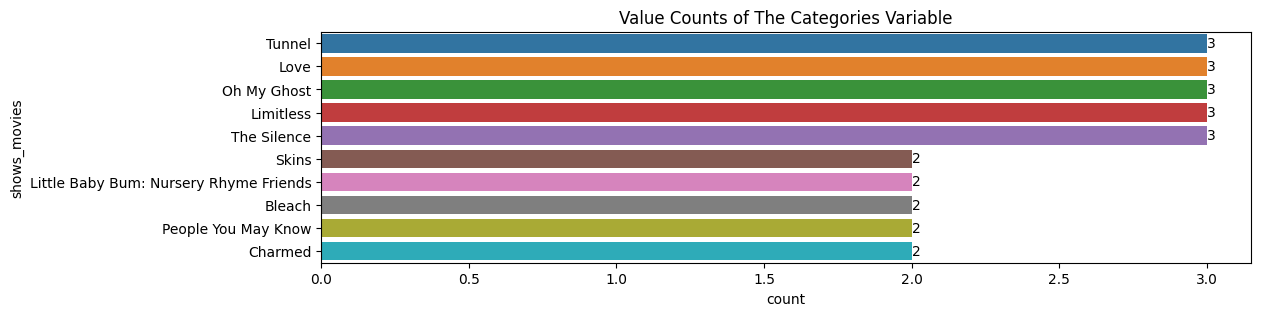

In [37]:
plt.figure(figsize=(12,3))
plt.title("Value Counts of The Categories Variable")
cp = sns.countplot(y="shows_movies", data=df, order=df.shows_movies.value_counts().iloc[:10].index)
cp.bar_label(cp.containers[0])

[Text(0, 0, '955'),
 Text(0, 0, '79'),
 Text(0, 0, '41'),
 Text(0, 0, '1288'),
 Text(0, 0, '413'),
 Text(0, 0, '437'),
 Text(0, 0, '62'),
 Text(0, 0, '160'),
 Text(0, 0, '31'),
 Text(0, 0, '227'),
 Text(0, 0, '27'),
 Text(0, 0, '202'),
 Text(0, 0, '7'),
 Text(0, 0, '2')]

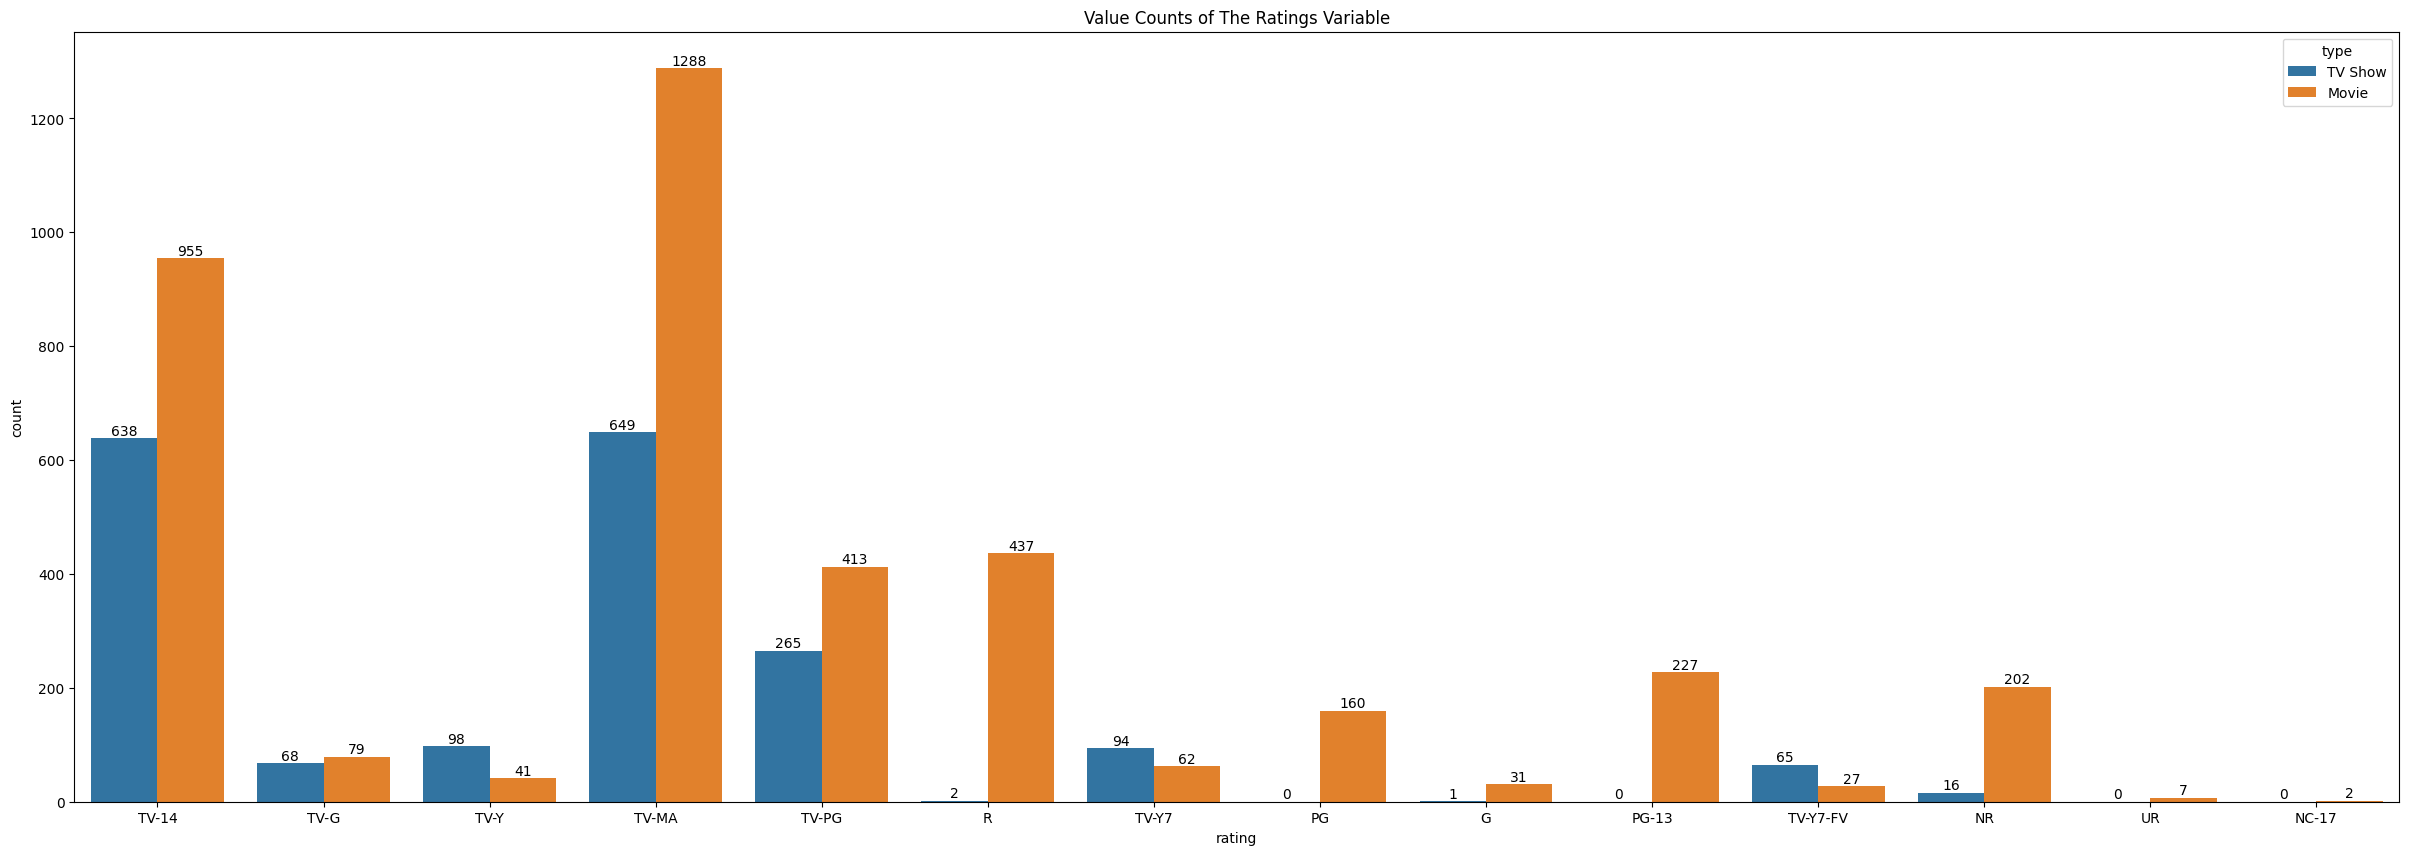

In [38]:
plt.figure(figsize=(30,10))
cp = sns.countplot(x="rating", data=df, hue = 'type')
plt.title("Value Counts of The Ratings Variable")
cp.bar_label(cp.containers[0])
cp.bar_label(cp.containers[1])

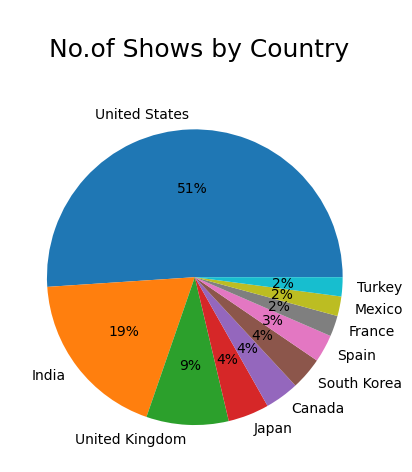

In [39]:
country = df['country'].value_counts().head(10)
ct = df['shows_movies'].value_counts()
plt.pie(data=ct, x=country.values, labels=country.index, autopct='%.f%%')
plt.title("\n No.of Shows by Country\n", fontsize=18)
plt.show()

c:\Users\Dell\miniconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



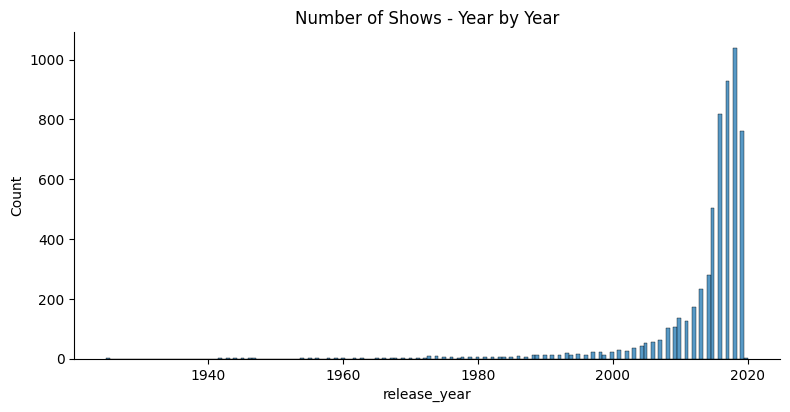

In [40]:
dt = sns.displot(data = df ,x="release_year", height=4,aspect=2)
dt.set(title='Number of Shows - Year by Year')

[Text(0, 0, '18'),
 Text(0, 0, '14'),
 Text(0, 0, '13'),
 Text(0, 0, '12'),
 Text(0, 0, '8'),
 Text(0, 0, '8')]

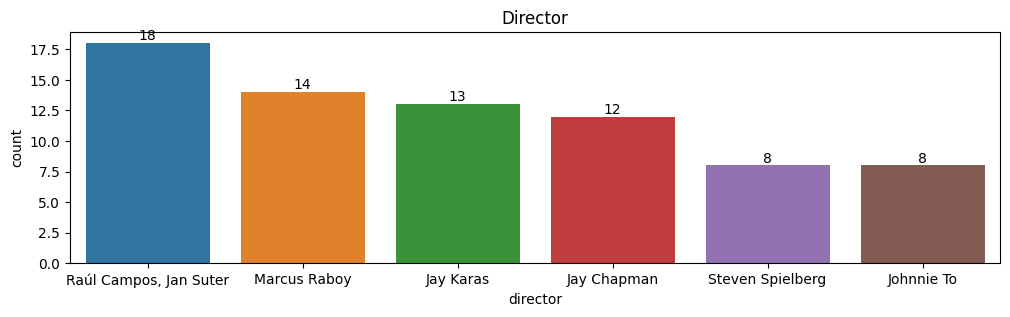

In [41]:
plt.figure(figsize=(12,3))
plt.title("Director")
ct = sns.countplot(x="director", data=df, order=df.director.value_counts().iloc[:6].index)
ct.bar_label(ct.containers[0])

In [43]:
country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

## countries 
from collections import Counter
colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]
    
def geoplot(ddf):
    country_with_code, country = {}, {}
    shows_countries = ", ".join(ddf['country'].dropna()).split(", ")
    for c,v in dict(Counter(shows_countries)).items():
        code = ""
        if c.lower() in country_codes:
            code = country_codes[c.lower()]
        country_with_code[code] = v
        country[c] = v

    data = [dict(
            type = 'choropleth',
            locations = list(country_with_code.keys()),
            z = list(country_with_code.values()),
            colorscale = [[0,"rgb(5, 10, 172)"],[0.65,"rgb(40, 60, 190)"],[0.75,"rgb(70, 100, 245)"],\
                        [0.80,"rgb(90, 120, 245)"],[0.9,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'gray',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                title = ''),
          ) ]

    layout = dict(
        title = '',
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )

    fig = dict( data=data, layout=layout )
    iplot( fig, validate=False, filename='d3-world-map' )
    return country

country_vals = geoplot(df)
tabs = Counter(country_vals).most_common(25)

labels = [_[0] for _ in tabs][::-1]
values = [_[1] for _ in tabs][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="Countries with most content", height=700, legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [44]:
col = "listed_in"
categories = ", ".join(d2['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()


In [45]:
def country_trace(country, flag = "movie"):
    df["from_us"] = df['country'].fillna("").apply(lambda x : 1 if country.lower() in x.lower() else 0)
    small = df[df["from_us"] == 1]
    if flag == "movie":
        small = small[small["duration"] != ""]
    else:
        small = small[small["season_count"] != ""]
    cast = ", ".join(small['cast'].fillna("")).split(", ")
    tags = Counter(cast).most_common(25)
    tags = [_ for _ in tags if "" != _[0]]

    labels, values = [_[0]+"  " for _ in tags], [_[1] for _ in tags]
    trace = go.Bar(y=labels[::-1], x=values[::-1], orientation="h", name="", marker=dict(color="#a678de"))
    return trace

from plotly.subplots import make_subplots
traces = []
titles = ["United States", "","India","", "United Kingdom", "Canada","", "Spain","", "Japan"]
for title in titles:
    if title != "":
        traces.append(country_trace(title))

fig = make_subplots(rows=2, cols=5, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)
fig.add_trace(traces[2], 1,5)
fig.add_trace(traces[3], 2,1)
fig.add_trace(traces[4], 2,3)
fig.add_trace(traces[5], 2,5)

fig.update_layout(height=2600, showlegend=False)
fig.show()


In [46]:
traces = []
titles = ["United States","", "United Kingdom"]
for title in titles:
    if title != "":
        traces.append(country_trace(title, flag="tv_shows"))
        


In [47]:
fig = make_subplots(rows=1, cols=3, subplot_titles=titles)
fig.add_trace(traces[1], 1,1)
fig.add_trace(traces[1], 1,3)

fig.update_layout(height=600, showlegend=False)
fig.show()

In [48]:
small = df[df["type"] == "Movie"]
small = small[small["country"] == "India"]

col = "director"
categories = ", ".join(small[col].fillna("")).split(", ")
counter_list = Counter(categories).most_common(12)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="orange"))

data = [trace1]
layout = go.Layout(title="Movie Directors from India with most content", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [49]:
small = df[df["type"] == "Movie"]
small = small[small["country"] == "United States"]

col = "director"
categories = ", ".join(small[col].fillna("")).split(", ")
counter_list = Counter(categories).most_common(12)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="orange"))

data = [trace1]
layout = go.Layout(title="Movie Directors from US with most content", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [50]:
tag = "jay karas"
df["relevant"] = df['director'].fillna("").apply(lambda x : 1 if tag in x.lower() else 0)
small = df[df["relevant"] == 1]
small[['shows_movies', 'release_year', 'listed_in']]

,shows_movies,release_year,listed_in
883,Demetri Martin: The Overthinker,2018,Stand-Up Comedy
1096,Adam Devine: Best Time of Our Lives,2019,Stand-Up Comedy
3181,Bill Burr: You People Are All the Same,2012,Stand-Up Comedy
3295,Ali Wong: Hard Knock Wife,2018,Stand-Up Comedy
3838,Tom Segura: Disgraceful,2018,Stand-Up Comedy
4214,Christina P: Mother Inferior,2017,Stand-Up Comedy
5148,Bill Burr: Walk Your Way Out,2017,Stand-Up Comedy
5474,Jeff Foxworthy and Larry the Cable Guy: We’ve ...,2016,Stand-Up Comedy
5491,Jim Gaffigan: Mr. Universe,2012,Stand-Up Comedy
5575,Ali Wong: Baby Cobra,2016,Stand-Up Comedy


In [51]:
tag = "Stand-Up Comedy"
df["relevant"] = df['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
small = df[df["relevant"] == 1]
small[small["country"] == "United States"][["shows_movies", "country","release_year"]].head(10)

,shows_movies,country,release_year
28,Mike Birbiglia: The New One,United States,2019
50,Mike Birbiglia: What I Should Have Said Was No...,United States,2008
96,Iliza Shlesinger: Unveiled,United States,2019
103,Jeff Dunham: All Over the Map,United States,2014
136,Jeff Garlin: Our Man In Chicago,United States,2019
158,Seth Meyers: Lobby Baby,United States,2019
304,Arsenio Hall: Smart & Classy,United States,2019
342,Jenny Slate: Stage Fright,United States,2019
411,Deon Cole: Cole Hearted,United States,2019
480,Nikki Glaser: Bangin’,United States,2019


In [52]:
tag = "Stand-Up Comedy"
df["relevant"] = df['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
small = df[df["relevant"] == 1]
small[small["country"] == "India"][["shows_movies", "country","release_year"]].head(10)


,shows_movies,country,release_year
4533,Aditi Mittal: Things They Wouldn't Let Me Say,India,2017
4855,Gangs of Hassepur,India,2014
